# Modeling Tabular Data

For a more comprehensive understanding of the model process, refer to the notebook in the directory learning_notebook "03-tabular-model".
The following cells present the final tabular model.

In [1]:
import warnings
warnings.filterwarnings("ignore")
from prep_pipeline import *
from imports import *
from initialize import *
%load_ext autoreload
%autoreload 2

In [2]:
df = pd.read_csv('data/cleaned_df_4_13.csv')
X_tr, X_v, y_tr, y_v = get_file_splits()
X_train, X_val, y_adas_train, y_adas_val, y_mmse_train, y_mmse_val = split_train_val(X_tr, X_v, y_tr, y_v, df)

In [3]:
X_train.shape, X_val.shape

((1158, 44), (247, 44))

## ADAS11 Prediction

In [4]:
from sklearn.ensemble import *

pipe = Pipeline([('regressor', HistGradientBoostingRegressor(loss = 'poisson', l2_regularization=1.4, max_depth = 15, random_state=42))])
train_preds, preds = tab_predict(pipe, X_train, y_adas_train, X_val, y_adas_val, 'hgradboost')

NameError: name 'HistGradientBoostingRegressor' is not defined

## Pearson Correlation

In [17]:
from scipy.stats.stats import pearsonr 

print(f'Validation Corr: {round(pearsonr(preds, y_adas_val)[0],3)}')
print(f'Train Corr: {round(pearsonr(train_preds, y_adas_train)[0],3)}')

Validation Corr: 0.855
Train Corr: 0.984


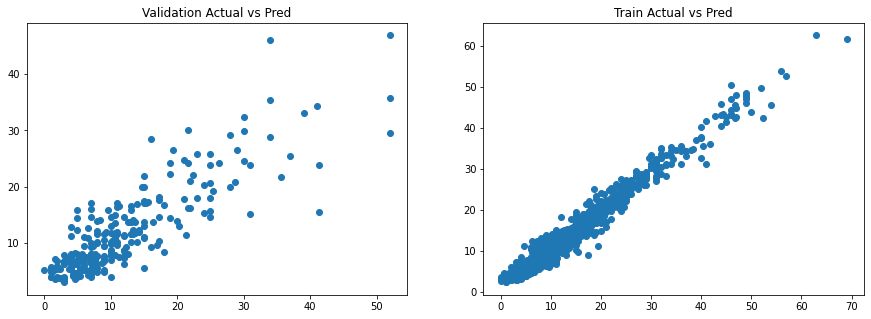

In [18]:
fig, ax = plt.subplots(1,2, figsize= (15,5))
ax[0].scatter(y_adas_val, preds)
ax[0].set_title('Validation Actual vs Pred')
ax[1].scatter(y_adas_train, train_preds)
ax[1].set_title('Train Actual vs Pred')
plt.show()

## MMSE Prediction

In [19]:
pipe = Pipeline([('regressor', HistGradientBoostingRegressor(loss = 'poisson', min_samples_leaf=10, l2_regularization=.4, max_depth = 15, random_state=42))])
mmse_train_pred, mmse_pred = tab_predict(pipe, X_train, y_mmse_train, X_val, y_mmse_val, 'hgradboost')

hgradboost Train Loss: 1.105
hgradboost  Train R2  : 0.949

hgradboost  Valid Loss: 7.209
hgradboost  Valid R2  : 0.663



In [21]:
from scipy.stats.stats import pearsonr 

print(f'Validation Corr: {round(pearsonr(mmse_pred, y_mmse_val)[0],3)}')
print(f'Train Corr: {round(pearsonr(mmse_train_pred, y_mmse_train)[0],3)}')

Validation Corr: 0.819
Train Corr: 0.976


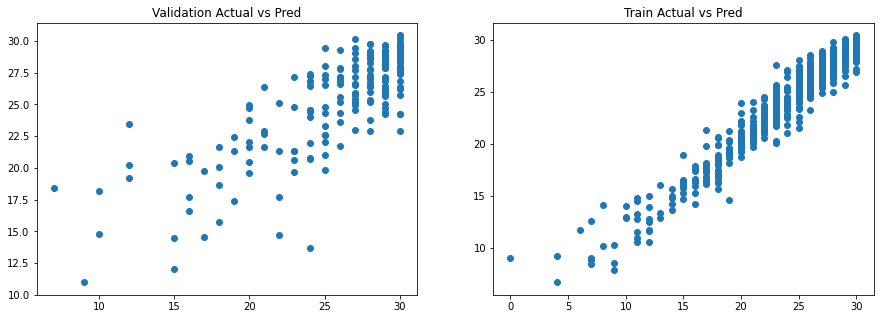

In [22]:
fig, ax = plt.subplots(1,2, figsize= (15,5))
ax[0].scatter(y_mmse_val, mmse_pred)
ax[0].set_title('Validation Actual vs Pred')
ax[1].scatter(y_mmse_train, mmse_train_pred)
ax[1].set_title('Train Actual vs Pred')
plt.show()